# DEEP LEARNING [TURMA 01B] - 2021/2
## Trilha 4: Tarefa (Peso 3)

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from IPython.display import display
from tensorflow import keras
from tensorflow.keras import layers

columns = ['CLASS', 'AGE','SEX','STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE','ANOREXIA','LIVER BIG', 'LIVER FIRM',
           'SPLEEN PALPABLE', 'SPIDERS','ASCITES','VARICES', 'BILIRUBIN', 'ALK_PHOSPHATE', 'SGOT','ALBUMIN', 'PROTOTIPE','HISTOLOGY']
dados = pd.read_csv(r'D:\Downloads\hepatitis.data', header=None)
dados.columns=columns

In [53]:
# tratando os dados

dados.replace('?', np.nan,inplace=True)
dados.dropna(inplace=True)

# Trocando os valores de Class para 0 e 1.
dados['CLASS'] = dados.CLASS.map({1:0,2:1})

In [54]:
# Expondo como ficou o tratamento dos dados
dados.head()

,CLASS,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTOTIPE,HISTOLOGY
5,1,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1
10,1,39,1,1,1,2,2,2,1,1,2,2,2,2,1.30,78,30,4.4,85,1
11,1,32,1,2,1,1,2,2,2,1,2,1,2,2,1.00,59,249,3.7,54,1
12,1,41,1,2,1,1,2,2,2,1,2,2,2,2,0.90,81,60,3.9,52,1
13,1,30,1,2,2,1,2,2,2,1,2,2,2,2,2.20,57,144,4.9,78,1


In [55]:
# Avaliando o Shape dos Dados
dados.shape

(80, 20)

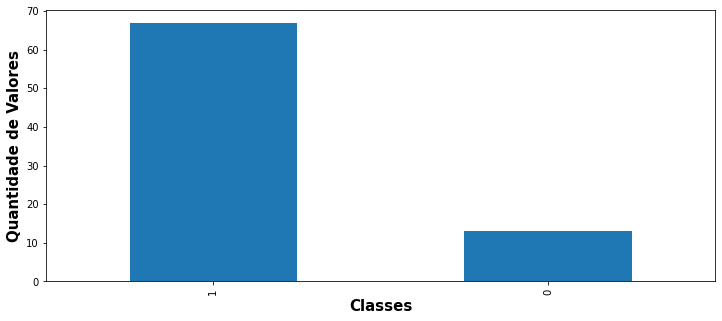

In [56]:
# Verificando o Balanceamento do DATASET
plt.figure(figsize=(12,5))
plt.ylabel("Quantidade de Valores", fontsize=15, fontweight='bold')
plt.xlabel("Classes", fontsize=15, fontweight='bold')
dados['CLASS'].value_counts().plot(kind='bar')
plt.show()

In [57]:
# Resolvendo esse problema de desbalanceamento com a técnica OVER-SAMPLING

ros = RandomOverSampler(random_state=123)

X_resample, y_resample = ros.fit_resample(dados.drop(labels=['CLASS'],axis=1),dados['CLASS'])

# Concatenando os dados Resampleados com OverSample
dados_resample = pd.concat([X_resample,y_resample],axis=1)

In [58]:
# Verificando o Shape dos dados antigos e Novos
print(f"Os dados anteriores tinham {dados.shape[0]} linhas e {dados.shape[1]} colunas.")
print(f"Os dados modificados têm {dados_resample.shape[0]} linhas e {dados_resample.shape[1]} colunas.")

Os dados anteriores tinham 80 linhas e 20 colunas.
Os dados modificados têm 134 linhas e 20 colunas.


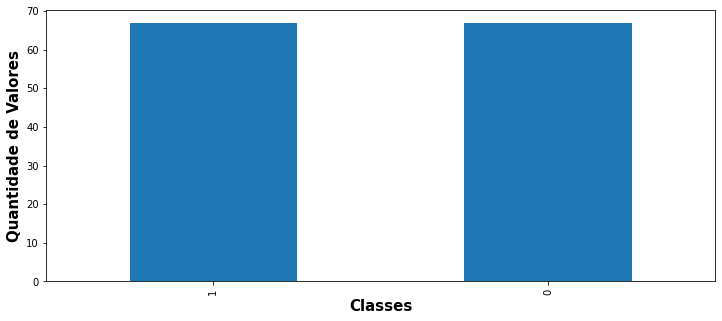

In [59]:
# Verificando o Balanceamento do DATASET após as modificações
plt.figure(figsize=(12,5))
plt.ylabel("Quantidade de Valores", fontsize=15, fontweight='bold')
plt.xlabel("Classes", fontsize=15, fontweight='bold')
dados_resample['CLASS'].value_counts().plot(kind='bar')
plt.show()

## MODELO DEEP LEARNING

### Preparando os dados

In [60]:
# Separando os dados de treinamento do Conjunto de Dados Modificado

X_train, X_test, y_train, y_test = train_test_split(dados_resample.drop(labels=['CLASS'],axis=1),dados_resample['CLASS'],
                                                    test_size=0.3, random_state=123)

display(X_train.head())
display(y_train.head())

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTOTIPE,HISTOLOGY
100,39,1,1,1,1,1,2,2,1,2,2,2,2,2.30,280,98,3.8,40,1
74,47,1,2,2,1,1,2,2,1,2,1,1,1,1.00,166,30,2.6,31,2
102,59,1,1,2,1,1,2,2,1,1,1,2,2,1.50,107,157,3.6,38,2
65,34,2,2,2,1,1,1,1,1,2,1,2,2,0.70,70,24,4.1,100,2
21,35,1,2,2,1,2,2,2,2,2,2,2,2,0.90,58,92,4.3,73,1


100    0
74     0
102    0
65     1
21     1
Name: CLASS, dtype: int64

### Declarando as camadas

In [61]:
model = keras.Sequential([
    layers.Dense(19, activation='tanh', input_shape=[19]),
    layers.Dense(1, activation='tanh'),
])

In [62]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 19)                380       
                                                                 
 dense_7 (Dense)             (None, 1)                 20        
                                                                 
Total params: 400
Trainable params: 400
Non-trainable params: 0
_________________________________________________________________


### Compilando o Modelo

In [63]:
model.compile(
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

### Treinando o Modelo

In [64]:
history = model.fit(
    np.asarray(X_train).astype(np.float32), np.asarray(y_train).astype(np.float32),
    batch_size=32,
    validation_split=0.3,
    epochs=30,
    verbose=0,
)

### Curva de Aprendizado

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,3.327487,0.661538,3.394284,0.714286
1,3.233572,0.738462,2.909763,0.714286
2,3.200847,0.738462,1.871287,0.750000
3,2.546107,0.784615,1.852821,0.785714
4,2.329362,0.784615,1.887197,0.785714


Best Validation Loss: 1.0527
Best Validation Accuracy: 0.8571


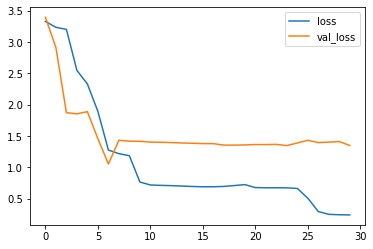

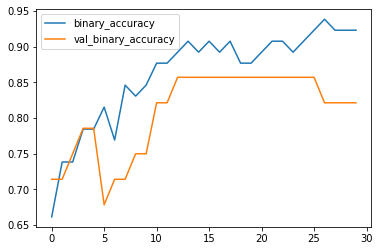

In [65]:
def display_hist(history):
    history_df = pd.DataFrame(history.history)
    display(history_df.head())

    # Plotando os Gráficos
    history_df.loc[0:, ['loss', 'val_loss']].plot()
    history_df.loc[0:,['binary_accuracy', 'val_binary_accuracy']].plot()

    print(("Best Validation Loss: {:0.4f}" "\nBest Validation Accuracy: {:0.4f}"\
          .format(history_df['val_loss'].min(),
                  history_df['val_binary_accuracy'].max())))

    return

display_hist(history)

In [66]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def print_results(y_test, y_pred):
    mc = pd.DataFrame(confusion_matrix(y_test,y_pred), index=['Atual: Não', 'Atual: Sim'],
                      columns=['Predição: Não', 'Predição: Sim'])
    display(mc)
    class_report = pd.DataFrame(classification_report(y_test,y_pred, output_dict=True)).transpose()
    display(class_report)
    print(f"Acuracidade: {round(accuracy_score(y_test,y_pred)* 100,2)} %")
    return

In [67]:
y_pred = model.predict(np.asarray(X_test).astype(np.float32)) > 0.5

In [68]:
print_results(np.asarray(y_test).astype(np.float32),y_pred)

,Predição: Não,Predição: Sim
Atual: Não,18,0
Atual: Sim,8,15


,precision,recall,f1-score,support
0.0,0.692308,1.000000,0.818182,18.000000
1.0,1.000000,0.652174,0.789474,23.000000
accuracy,0.804878,0.804878,0.804878,0.804878
macro avg,0.846154,0.826087,0.803828,41.000000
weighted avg,0.864916,0.804878,0.802077,41.000000


Acuracidade: 80.49 %


### Conclusão

O Modelo apresentou um desempenho *satisfatório* diante dos poucos dados para treinamento.